<a href="https://colab.research.google.com/github/fadodo/ML_Bank_customer_Churn/blob/main/ML_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting customer churn in a bank thank to Machine Learning


We will work on the dataset available on Kaggle [here](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction).

## Data loading

In [ ]:
### Connect to my drive
from google.colab import drive

#auth.authenticate_user()
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## load data
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

## Data exploration

### Checking the dataset lines, columns, type and format

In [ ]:
# get a global insight of the data
df.info()
#
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Checking Null and missing values

In [ ]:
# Check null and missing values
df.isnull().sum()

# Percentage of null or missiong values
df.isnull().sum()*100/(len(df))

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.009998
Gender,0.000000
Age,0.009998
Tenure,0.000000
Balance,0.000000
NumOfProducts,0.000000


### Cleaning the data set to remove all the null entries

In [ ]:
df_clean= df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# Proceeding to an supervised classification task

The goal is to predict bank customer churn with customers valuable variables such as :
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer

## Definition of the Feature and Target data

*   Élément de liste
*   Élément de liste



In [ ]:
# Features (independent variables) 2D array

X = df_clean.drop(columns=['RowNumber','CustomerId', 'Surname', 'Exited'])

# Target (dependent variable) 1D array

y = df_clean['Exited']


## Spliting the dataset in 3 subsets. 60 % for training, 20 % for est and 20% for evaluation



In [ ]:

# import of the model_selection module

from sklearn.model_selection import train_test_split, cross_val_score

# First split the dataset in 2 subsets X_train and X_test

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, train_size=0.6)

In [ ]:
# Second , Split the X_test subset in 2 Susets  X_test and X_eval

X_test, X_eval, y_test, y_eval=train_test_split(X_test, y_test, random_state=42, test_size=0.5)

## Data structuration

### Selection of the the numerical and non_numerical columns from features

In [ ]:
## Selection of the numerical and non numerical columns of the training subset

## Identify the -- numerical -- variables
X_train_num=X_train.select_dtypes(include=['number'])

## Identify the -- categorical -- variables
X_train_cat=X_train.select_dtypes(exclude=['number'])

In [ ]:
## Selection of the numerical and non numerical columns of the test subset

## Identify the -- numerical -- variables
X_test_num=X_test.select_dtypes(include=['number'])

## Identify the -- categorical -- variables
X_test_cat=X_test.select_dtypes(exclude=['number'])

In [ ]:
## Selection of the numerical and non numerical columns of the test subset

## Identify the -- numerical -- variables
X_eval_num=X_test.select_dtypes(include=['number'])

## Identify the -- categorical -- variables
X_eval_cat=X_test.select_dtypes(exclude=['number'])

### Standard Scaling of numeric features

In [ ]:
# import of package

from sklearn.preprocessing import StandardScaler, robust_scale

# instantiate StandardScaler

stds=StandardScaler()


# Fit and transform data

X_train_num_scale=stds.fit_transform(X_train_num)

X_test_num_scale=stds.transform(X_test_num)

X_eval_num_scale=stds.transform(X_eval_num)

### One Hot Encoder of non numerical features to transform them in numerical feature

In [ ]:
# import of the preprocessing module

from sklearn.preprocessing import OneHotEncoder


# instantiate encoder

Ohe = OneHotEncoder()


# Convert text into binary features

X_train_cat_enc=Ohe.fit_transform(X_train_cat)

X_test_cat_enc=Ohe.transform(X_test_cat)

X_eval_cat_enc=Ohe.transform(X_eval_cat)

### Concatenation of the numerical and non_numerical features together for X_train, X_test and X_eval subsets

In [ ]:
### Concatenate the numerical and non_numerical features together using join

X_train_final = pd.DataFrame(X_train_cat_enc.toarray(), columns=Ohe.get_feature_names_out()).join(pd.DataFrame(X_train_num_scale, columns=X_train_num.columns), how='inner')


# Verify the data

X_train_final.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,0.0,1.0,0.0,-0.022611,-0.180055,1.030235,0.621716,-0.920487,0.63951,0.95181,0.107379
1,0.0,0.0,1.0,1.0,0.0,0.297036,-0.838030,-0.691320,-1.213628,-0.920487,0.63951,-1.05063,1.042482
2,1.0,0.0,0.0,0.0,1.0,-0.692841,0.947904,1.030235,1.549106,-0.920487,0.63951,-1.05063,0.233368
3,1.0,0.0,0.0,0.0,1.0,0.462016,-0.932027,1.030235,-1.213628,0.820629,0.63951,-1.05063,1.585168
4,0.0,0.0,1.0,0.0,1.0,0.162991,0.007938,0.685924,1.466626,-0.920487,0.63951,0.95181,-1.037513


In [ ]:
### Concatenate the numerical and non_numerical features together using join

X_test_final = pd.DataFrame(X_test_cat_enc.toarray(), columns=Ohe.get_feature_names_out()).join(pd.DataFrame(X_test_num_scale, columns=X_test_num.columns), how='inner')


# Verify the data

X_test_final.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,0.0,1.0,0.0,0.389837,-0.838030,-0.002698,0.972248,-0.920487,0.639510,0.95181,-1.025575
1,0.0,1.0,0.0,1.0,0.0,-1.311514,-0.180055,1.374546,0.825559,0.820629,0.639510,-1.05063,1.383524
2,1.0,0.0,0.0,0.0,1.0,1.390026,-0.650037,-1.035631,0.713136,0.820629,-1.563696,-1.05063,-0.365684
3,1.0,0.0,0.0,0.0,1.0,-0.661907,0.007938,1.718857,-1.213628,0.820629,0.639510,0.95181,1.222207
4,0.0,1.0,0.0,0.0,1.0,0.121746,-0.180055,0.685924,1.083819,0.820629,-1.563696,0.95181,1.328483


In [ ]:
### Concatenate the numerical and non_numerical features together using join

X_eval_final = pd.DataFrame(X_eval_cat_enc.toarray(), columns=Ohe.get_feature_names_out()).join(pd.DataFrame(X_eval_num_scale, columns=X_eval_num.columns), how='inner')


# Verify the data

X_eval_final.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,0.0,1.0,0.0,0.389837,-0.838030,-0.002698,0.972248,-0.920487,0.639510,0.95181,-1.025575
1,0.0,1.0,0.0,1.0,0.0,-1.311514,-0.180055,1.374546,0.825559,0.820629,0.639510,-1.05063,1.383524
2,1.0,0.0,0.0,0.0,1.0,1.390026,-0.650037,-1.035631,0.713136,0.820629,-1.563696,-1.05063,-0.365684
3,1.0,0.0,0.0,0.0,1.0,-0.661907,0.007938,1.718857,-1.213628,0.820629,0.639510,0.95181,1.222207
4,0.0,1.0,0.0,0.0,1.0,0.121746,-0.180055,0.685924,1.083819,0.820629,-1.563696,0.95181,1.328483


## Instantiation of the Model

Select the right model according to the task and train it on the appropriate data.

In [ ]:
# import

from sklearn.linear_model import LogisticRegression


# Instantiate the model

modell=LogisticRegression()


### Cross-validation score Model

In [ ]:
# W

scores=cross_val_score(estimator=modell, X=X_train_final, y=y_train, cv=5)

print(scores)

print(f' The cross-validation score is : {scores.mean()}')

[0.805      0.80916667 0.81666667 0.8148457  0.80817348]
 The cross-validation score is : 0.8107705031971086


### Fitting the Model

In [ ]:
## Fitting of the model

modell.fit(X_train_final,y_train)


LogisticRegression()

### Scoring the model

In [ ]:
## Scoring of the model

score = modell.score(X_test_final, y_test)

print(f' The model score is : {score}')

 The model score is : 0.8065


## Evaluating the model

In [ ]:
# Prediction with the model

y_pred=modell.predict(X_eval_final)

### Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique classes from y_eval
# This assumes y_eval contains the true labels for your evaluation data
classes = y_eval.unique()

# Create confusion matrix with the unique classes
cm = confusion_matrix(y_eval, y_pred, labels=classes)

print(cm)

[[1489   92]
 [ 392   27]]


### Dislay the matrix confusion

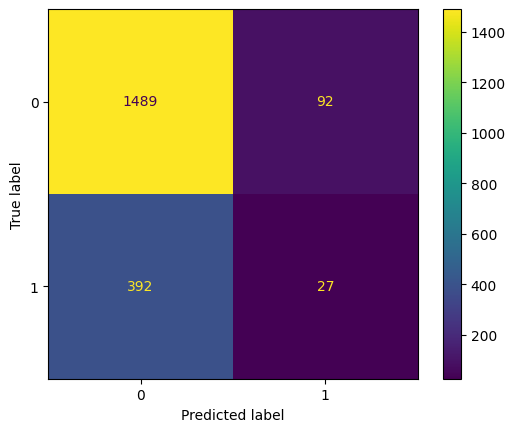

In [ ]:
## Display of the Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

### Display the Classification report

In [ ]:
## Print the classification report

print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1581
           1       0.23      0.06      0.10       419

    accuracy                           0.76      2000
   macro avg       0.51      0.50      0.48      2000
weighted avg       0.67      0.76      0.70      2000



# Interpretation

- The model shows an accuracy of 0,76 which is a good performance of the model

- The **precision** shows that out of all the customer that the model predicted would churned, only 23 % actually did.

- The **recall** shows that out of all the customers that actually did churned, the model only predicted this outcome correctly for 6% of those customers.

- The **f1-score** shows that the model does a good job of predicting the unchurned customers.

- The **support** : we have 1581 of class 0 and 419 of class 1, which is a really unbalanced dataset.

# ***Overall, this classifier or model is better to find class 0 over class 1. That is not in accordance of our goal to better predict a bank customer churn.***





